In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Reading

In [74]:
red=pd.read_csv('D:/ML/Wine_Quality_Prediction/Dataset/wineQualityReds.csv')

There are two datasets in kaggle which are for type of wine that is Red, White. Here We will work on Red Wine dataset.

In [75]:
red.head(10)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


* volatile acidity :   Volatile acidity is the gaseous acids present in wine.

* fixed acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic

* residual sugar :   Amount of sugar left after fermentation.

* citric acid :    It is weak organic acid, found in citrus fruits naturally.

* chlorides :   Amount of salt present in wine.

* free sulfur dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.

* total sulfur dioxide

* pH :   In wine pH is used for checking acidity
* density
  
* sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.

* alcohol :   Percent of alcohol present in wine.

# Data Exploration

* there are no categorical variables. each feature is a number. Regression problem. 
* Given the set of values for features, we have to predict the quality of wine.
* finding correlation of each feature with our target variable - quality

In [76]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [77]:
red.isna().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [78]:
red.dtypes

fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Visualization**

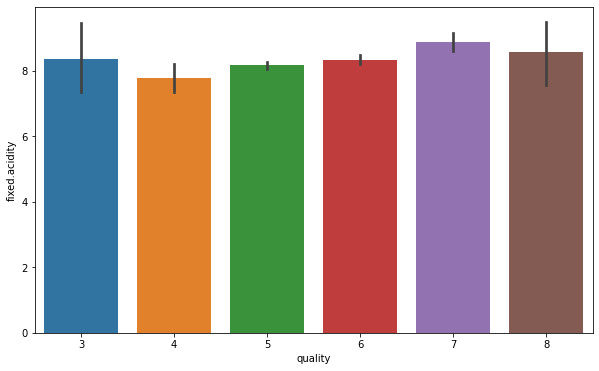

In [82]:
ig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed.acidity', data = red)

Here we see that its quite a downing trend in the volatile acidity as we go higher the quality

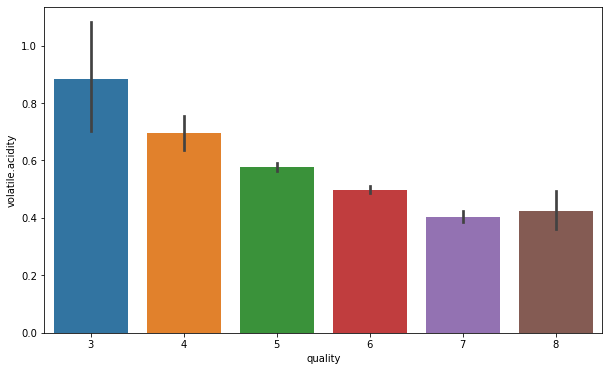

In [83]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile.acidity', data = red)

Composition of citric acid go higher as we go higher in the quality of the wine

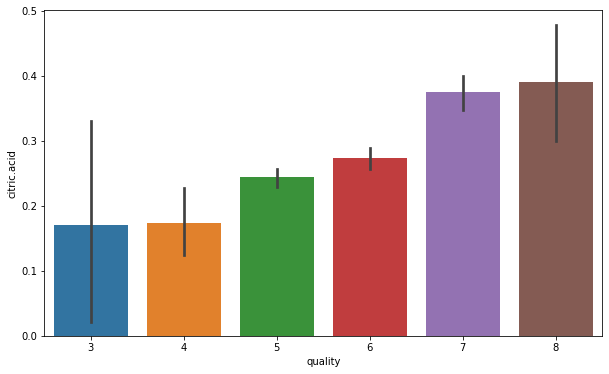

In [85]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric.acid', data = red)

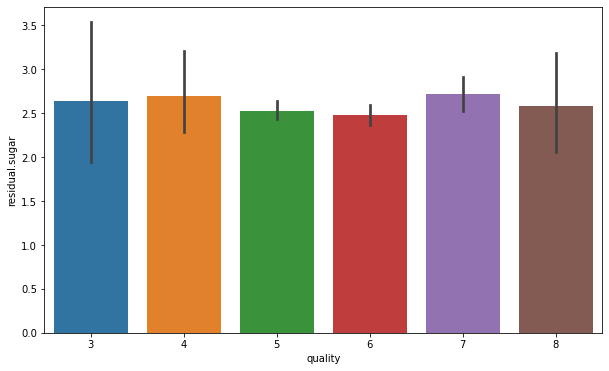

In [86]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual.sugar', data = red)

Composition of chloride also go down as we go higher in the quality of the wine

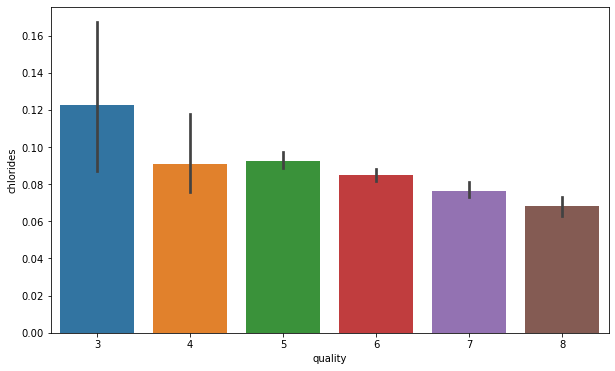

In [87]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = red)

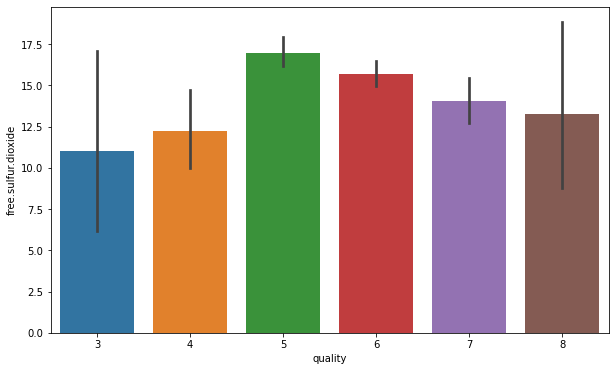

In [88]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free.sulfur.dioxide', data = red)

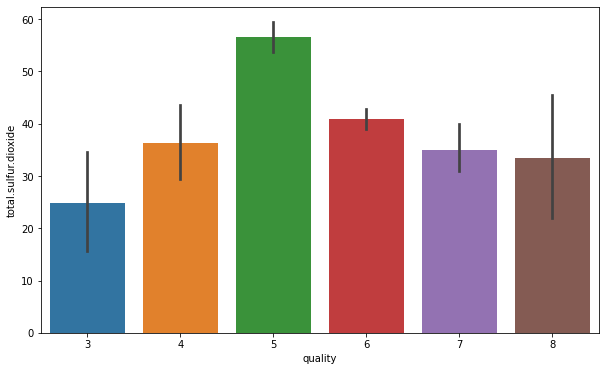

In [90]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total.sulfur.dioxide', data = red)

Sulphates level goes higher with the quality of wine

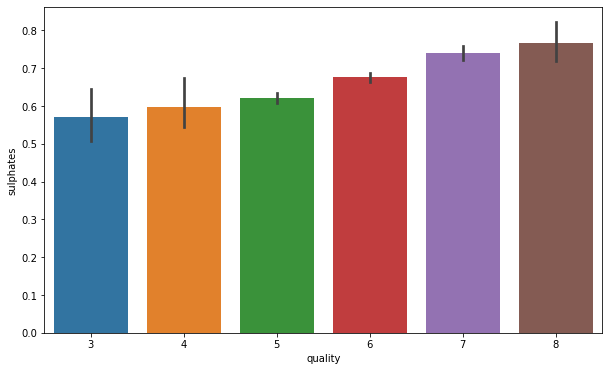

In [91]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = red)

Alcohol level also goes higher as te quality of wine increases

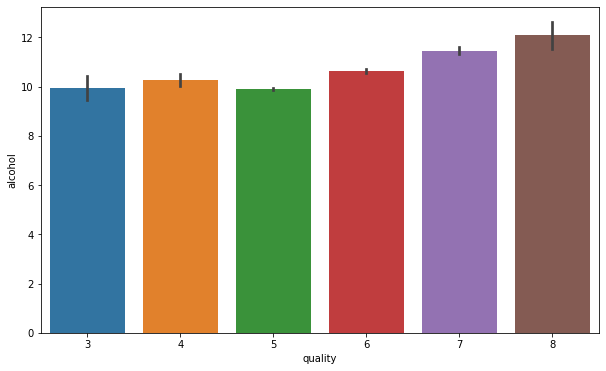

In [93]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = red)

**PreProcessing of data**

Making binary classificaion for the response variable.

Dividing wine as good and bad by giving the limit for the quality

In [95]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
red['quality'] = pd.cut(red['quality'], bins = bins, labels = group_names)


In [96]:
#assign a labels to our quality variable
label_quality = LabelEncoder()

In [98]:
red['quality'] = label_quality.fit_transform(red['quality'])

In [99]:
red['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


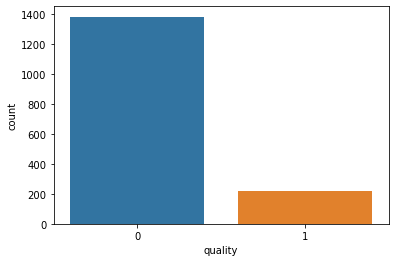

In [100]:
sns.countplot(red['quality'])

Now seperate the dataset as response variable and feature variabes

In [101]:
X = red.drop('quality', axis = 1)
y = red['quality']

In [102]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [103]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [104]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Model Building**

1. **Random Forest**

In [105]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [106]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.36      0.46        47

    accuracy                           0.88       320
   macro avg       0.76      0.66      0.69       320
weighted avg       0.86      0.88      0.86       320



In [107]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[263  10]
 [ 30  17]]


2. **Support Vector Classifier**

In [108]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [109]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



**Random Forest Classifier gives accuracy of 87%
  While Support Vector Classifier gives accuracy of 86%**

One can improve the accuracy by using Grid Search CV which will boost the accuracy by 3-4%.

In [111]:
import pickle
file='wine Quality.pkl'
save=pickle.dump(rfc,open(file,'wb'))

**Lets dive in for model creation**